# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [11]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [12]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task
from task import Task

#from agents.policy_search import agent

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode

#init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose

init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
#agent = My_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

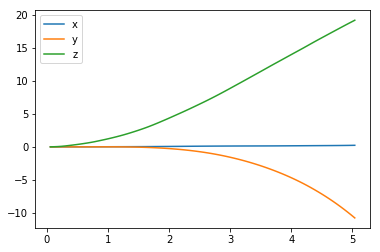

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

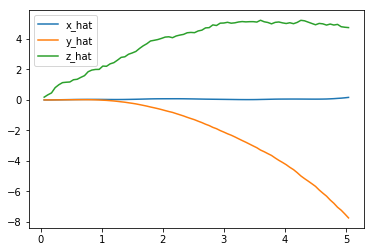

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

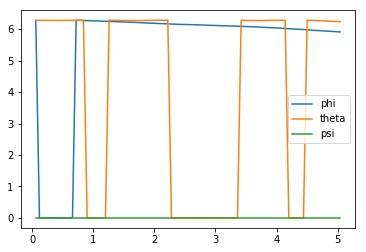

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

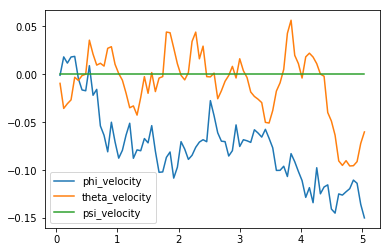

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

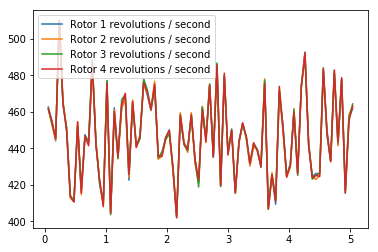

In [17]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [18]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  0.23883166 -10.74475897  19.15505628   5.91067804   6.23817509   0.        ]
[ 0.16649833 -7.75238766  4.75356188]
[-0.14981422 -0.06006854  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [5]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   0.814 (best =   1.909), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [92]:
## TODO: Train your agent here.
################################################################
#### basic Agent for initital testing-debugging
################################################################

import sys
import pandas as pd
import numpy as np
from agents.agent import My_Agent
from task import Task

num_episodes = 1000
###################################################################################
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode

#init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_pose = np.array([0., 0., 0.5, 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
###################################################################################
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose,target_pos=target_pos)
agent = My_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   3.000 (best =   3.000), noise_scale = 3.25

In [5]:
## TODO: Train your agent here.
################################################################
#### DDPG Agent to Take off and Hover
################################################################
%load_ext autoreload
#%reload_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
from agents.agent_DDPG import DDPG_Hover, DDPG_Land

#from agents.actor import Actor
#from agents.critic import Critic
#from agents.replay_buffer import ReplayBuffer
#from agents.ounoise import OUNoise

from keras import layers, models, optimizers
from task import Task_Hover, Task_Land
import csv

############################## Initialize environment ###########################
num_episodes = 100
#runtime = np.inf
runtime = 5.                # time limit of the episode

# Modify the values below to give the quadcopter a different starting position.
                                    
init_pose = np.array([0., 0., 0.5, 0., 0., 0.])  # initial pose
target_pos = np.array([0., 0., 10.])             # Target pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
#################################################################################

################################ Measurements section ###########################
# Setup
file_output = 'My_data_DDPG_Hover.txt'                         # file name for saved results
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'episode','total_reward']
results = {x : [] for x in labels}
csvfile = open(file_output, 'w')
writer = csv.writer(csvfile)
writer.writerow(labels)
done = False
#################################################################################


task = Task_Hover(init_pose=init_pose,target_pos=target_pos)
#task = Task(init_pose=init_pose,target_pos=target_pos, runtime=runtime)
agent = DDPG_Hover(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)  # actions are a 1-D array of rotor speeds
        next_state, reward, done = task.step(action)
        agent.step(action, reward,next_state, done)
        state = next_state
                        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
                #i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
                
            ############################## write to file ####################################
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + \
                        list(action) + [i_episode] + [agent.total_reward]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            #################################################################################
            break
     
    sys.stdout.flush()
csvfile.close ()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  100, score =   0.827 (best = 142.617)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

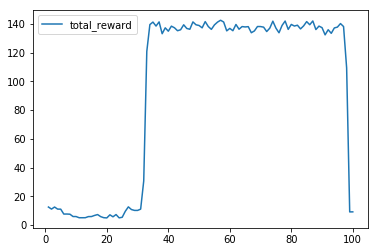

In [6]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['total_reward'], label='total_reward')

plt.legend()
_ = plt.ylim()

In [7]:
#mean reward of the last 10 episodes

np.mean(results['total_reward'][-10:])

108.31696632520081

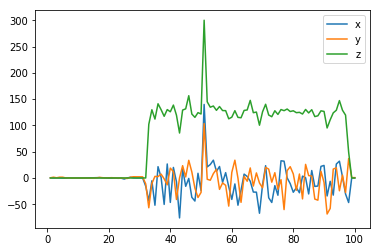

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['x'], label='x')
plt.plot(results['episode'], results['y'], label='y')
plt.plot(results['episode'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

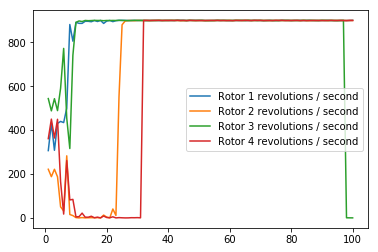

In [9]:
plt.plot(results['episode'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['episode'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['episode'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['episode'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [51]:
## TODO: Train your agent here.

# This did not produce expected (consistent results between runs)
#import numpy as np
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

#seed = 1
#np.random.seed(seed)
#PYTHONHASHSEED=1

################################################################
#### DDPG Agent Land
################################################################
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
from agents.agent_DDPG import DDPG_Land

from keras import layers, models, optimizers
from task import Task_Land
import csv

############################## Initialize environment ###########################
num_episodes = 200
#runtime = np.inf
runtime = 5.                # time limit of the episode

# Modify the values below to give the quadcopter a different starting position.
                                    
init_pose = np.array([0., 0., 10.0, 0., 0., 0.])  # initial pose
target_pos = np.array([0., 0., 0.])             # Target pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
#################################################################################

################################ Measurements section ###########################
# Setup
file_output = 'My_data_DDPG_Land.txt'                         # file name for saved results
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'episode','total_reward']
results = {x : [] for x in labels}
csvfile = open(file_output, 'w')
writer = csv.writer(csvfile)
writer.writerow(labels)
done = False
#################################################################################

###################### added code to save the model architecture and weights #####################
#from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

#model.save_weights('my_model_weights.h5')
##################################################################################################

task = Task_Land(init_pose=init_pose,target_pos=target_pos)
agent = DDPG_Land(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    #print (state)
    while True:
        action = agent.act(state)  # actions are a 1-D array of rotor speeds
        next_state, reward, done = task.step(action)
        agent.step(action, reward,next_state, done)
        state = next_state
                        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
                
            ############################## write to file ####################################
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + \
                        list(action) + [i_episode] + [agent.total_reward]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            #################################################################################
            break
     
    sys.stdout.flush()
csvfile.close ()

#agent.actor_local.model.save_model('my_actor_local_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
#agent.actor_local.model.save_weights('my_actor_local_model.h5')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  200, score =   1.245 (best =  39.057)

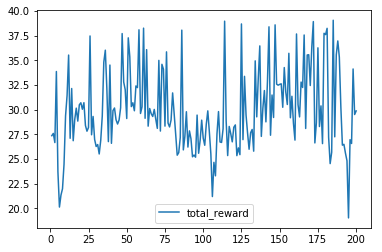

In [52]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['total_reward'], label='total_reward')

plt.legend()
_ = plt.ylim()

In [53]:
#mean reward of the last 10 episodes

np.mean(results['total_reward'][-10:])

26.935711872002788

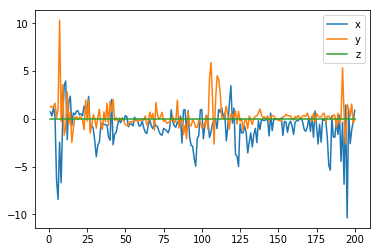

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['x'], label='x')
plt.plot(results['episode'], results['y'], label='y')
plt.plot(results['episode'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

<span style="color:blue">
    
<font color='blue'>

I supplemented the provided basic reward function with two techniques described here:

<br/>

- I created a new variable (self.good_position_count) that tracks the agent when it matches the target position of the Quadcopter and increment the variable every time it reaches the target position.
- When the self.good_position_count variable is acheived 5 consecutive times then I consider that the agent has acheived the target position succesfully  and I end the episode when that occurs and I reset the variable for the next episode.
- I use this variable to increase the reward provided to the agent, as I multiply this variable by 1 as shown in the reward function below:

<font color='red'>
> reward = (1. * self.good_position_count)-.2*(abs(self.sim.pose[:3] - self.target_pos)).sum()

<font color='blue'>
The second technique I used is to eliminate negative reward values as I found that they do not encourage or guide the agent to learn the required task well, maybe because the Neural Network does not work well with negative reward numbers.
I basically used the sigmoid function to return small positive values when the reward is negative as in the following code:

<font color='red'>
> if reward < 0:    
       reward = 1/(1+np.exp(-reward))

<font color='blue'>
using both of these techniques for thr reward function has helped the agent learn the task and acheive the desired target position, as in take off and hover or land.

</font>
</span>

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

<span style="color:blue">
<font color='blue'>

I tried for the agent to perform two tasks:  Take-off and Hover, and the second task is Land.
<br/>

I initially experiminted in creating my own own agent using some of the continous RL techniques covered in class such as Temporal Difference and continous RL, but it was too difficut to create such agent from scratch.
<br/>

I then tried the DDPG (Deep Deterministic Policy Gradients) Actor/Critic agents provided in the sample code in the project.
They produced better agent learning results but they were not consistent across the two tasks that I have attempted.
<br/>

I then split the two agents and split the two tasks as well into sepearate classes (Actor_Hover, Actor_Land) and (Task-Hover, Task_Land) respectively.
<br/>

I also experminted with the hyperparameters, such as the gamma (discount factor), and Tau (soft updates of target position).
I initially reduced te Tau value to 0.005 from 0.01 which did help the Landing task agent learn faster, but it did not help the Hover agent, so I used the initial value of 0.01 in both.
<br/>

I also experiminted with the agent buffer size, and I reduced it from 100,000 t0 50,000 but again that seems to have helped the Land agent but not the Hover agent.
<br/>

I also experminted with the runtime parameter, and I used a very large (-infinity) value instead of the 5 espisodes that it was initially set to.  I did this because it seems that for a continous action agent such as the ones we have here, it should not be bounded by a time episode but rather the espisode should finish when the target position is reached.  This did not work too well for the agents, so i just used the initial runtime = 5.0
<br/>

I used the following neural network architecture (gidden layers) for the Hover agent (for both the Actor and Critic):


- 32-node Dense layer with Relu Activatio function
- Dropout layer of 0.2
- 64-node Dense layer with Relu Activatio function
- Dropout layer of 0.2
- 32-node Dense layer with Relu Activatio function
- Dropout layer of 0.2


I used the following neural network architecture for the Land agent:
I used Batch Normalization technique to reduce the learning time and improve the accuracy of the agent actions as described in the following blog post.
https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/
<br/>

- 32-node Dense layer without the bias
- A BatchNormalization layer followed by a Relu activation function
- 64-node Dense layer without the bias
- A BatchNormalization layer followed by a Relu activation function
- 32-node Dense layer without the bias
- A BatchNormalization layer followed by a Relu activation function

This neural network worked well for the Land agent, and the batch normalization seems to speed the learning process and the accuracy of the actions abd also it eliminates the need for a Dropout layer.
<br/>

I tried this neural network for the Hover agent but it did not work well, so I did not use this technique for the Hover agent, and I used the Dropout layer instead.

</font>
</span>

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

<span style="color:blue">
<font color='blue'>
    
This task was very hard for the agent to learn, there were many parameteres to tweak, and te run time was long so experimenting with all of them and measuring their effect on the agent learning process was very difficult.
<br/>
<br/>

The leaning curve is generally gradual at first, but there seems to be an aha moment when the agent reaches the target position and it stays around the target position as the rewards are higher.  This is especially the case for the reward function that I designed and described above, as I increase the reward for the agent as he gets close to the target position.
<br/>
<br/>

This was the case for the Hover agent, as the mean rewards over the last 10 episodes was 108 which is relatively a high value
<br/>

But for the Land agent it seems to be gradual, and the mean rewards iver the last 10 episodes ws about 27 points.


</font>
</span>

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

<span style="color:blue">
<font color='blue'>

The hardest part of this project initially was getting started, as training an agent in continous space does not seem to be an easy task.

Then it was experimenting with the task reward function so that the agent is directed toward the goal
<br/>

One of the main difficulties I faced was the random nature of each run, and some of the runs did not produce satisfactory results.  I tried to resolve this by specifyng a seed from numpy/ramdom and also specifying a seef for tensoflow, but this did not resolve the random nature of each run.

I then tried to save the neural network weight parameters for each run, such that I would load those weights that produced the best results, but I unfirtunately did not get this to work either.

in this project and for both agents, I mainly focused on the Z (vertical) position of the agent and considered it more or less a success if the desired target position matched the agent position mainly in the Z direction just to simplify the problem.

I also spent a lot of time trying to understand exactly what the code was doing by introducing many print statements in various locations in the agent and task classes, and carefully going through the output until I reached a satisfactory level of understaning the core.  

All in all this was a difficult project, and I spent a lot of time in trying to resolve and provide at least acceptable agent learning performance for the required task.

</font>
</span>